In [11]:
# import libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

## Load training data

In [13]:
train = pd.read_csv('../data/train.csv')

In [14]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
# Conver IsHoliday to 0/1
train['IsHoliday'] = train['IsHoliday'].astype('int')

In [33]:
def plot_store_series(df, xval, yval, store, dept, ax=None):
    if ax:
        df[(df['Store']==store) & (df['Dept']==dept)].plot(x=xval, y=yval, label=str(store)+':'+str(dept)+'-'+yval, ax=ax)
    else:
        df[(df['Store']==store) & (df['Dept']==dept)].plot(x=xval, y=yval, label=str(store)+':'+str(dept)+'-'+yval)

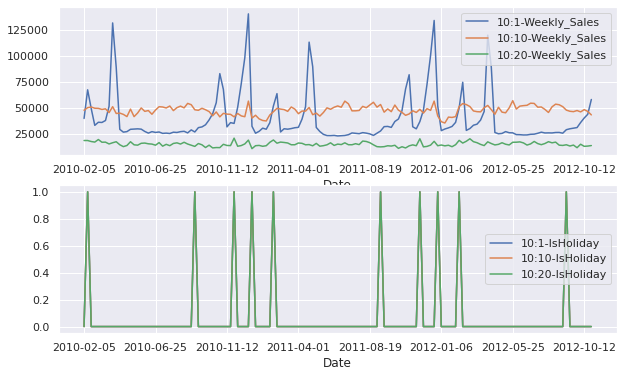

In [36]:
fig,ax = plt.subplots(nrows=2,figsize=(10,6))

for dept in [1,10,20]:
    plot_store_series(train,'Date','Weekly_Sales',10, dept, ax[0])
    plot_store_series(train,'Date','IsHoliday',10, dept, ax[1])

## Load test data

In [37]:
test = pd.read_csv('../data/test.csv')

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [39]:
test['IsHoliday'] = test['IsHoliday'].astype('int')